In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.formula.api as smf

In [4]:
coca_cola=pd.read_excel("CocaCola_Sales_Rawdata.xlsx",header=0,parse_dates=True)
coca_cola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
coca_cola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
coca_cola.shape

(42, 2)

In [10]:
#Set DateTime
coca_cola["Q_Year"]=coca_cola["Quarter"].str.split('_').apply(lambda x:" 19".join(x[:]))
coca_cola.head()

,Quarter,Sales,Q_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987


In [11]:
coca_cola["date"]=(pd.to_datetime(coca_cola["Q_Year"].str.split(' ').apply(lambda x: ''.join(x[::-1])), dayfirst=True))

In [12]:
coca_cola.head()

,Quarter,Sales,Q_Year,date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01


In [13]:
coca_cola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Quarter  42 non-null     object        
 1   Sales    42 non-null     float64       
 2   Q_Year   42 non-null     object        
 3   date     42 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.4+ KB


In [14]:
coca_cola.drop(columns=["Quarter","Q_Year"],inplace=True)

In [15]:
coca_cola.head()

,Sales,date
0,1734.827000,1986-01-01
1,2244.960999,1986-04-01
2,2533.804993,1986-07-01
3,2154.962997,1986-10-01
4,1547.818996,1987-01-01


In [17]:
coca_cola[coca_cola.duplicated()].shape

(0, 2)

In [19]:
#Arranging the columns
coke=coca_cola[["date","Sales"]]
coke.head()

,date,Sales
0,1986-01-01,1734.827000
1,1986-04-01,2244.960999
2,1986-07-01,2533.804993
3,1986-10-01,2154.962997
4,1987-01-01,1547.818996


In [20]:
coke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    42 non-null     datetime64[ns]
 1   Sales   42 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 800.0 bytes


In [21]:
coke.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [22]:
coke.set_index("date",inplace=True)

In [23]:
coke.head()

,Sales
date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


In [24]:
coke.index.year

Int64Index([1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988,
            1988, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1991, 1991,
            1991, 1991, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1994,
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1996, 1996],
           dtype='int64', name='date')

In [25]:
df=coke.copy()
df.head()

,Sales
date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


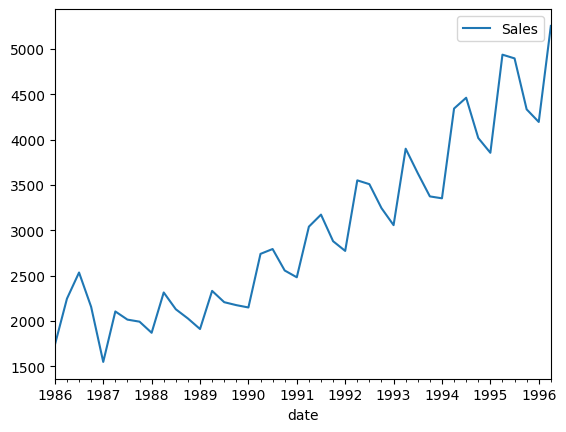

In [26]:
df.plot()
plt.show()

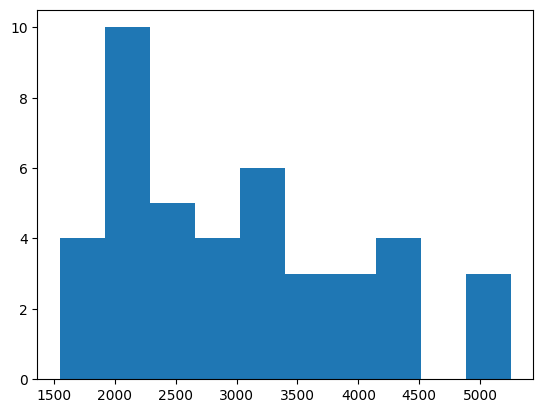

In [27]:
plt.hist(df)
plt.show()

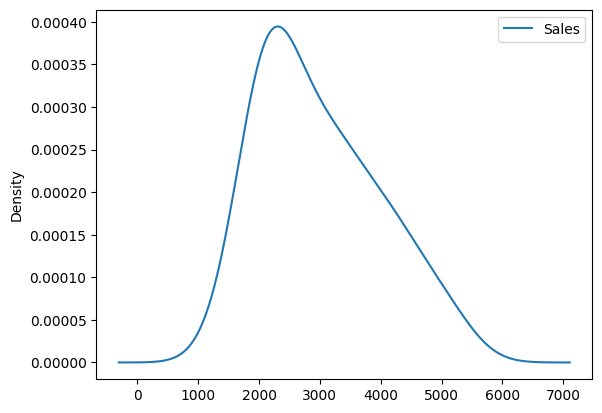

In [28]:
df.plot(kind="kde")
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

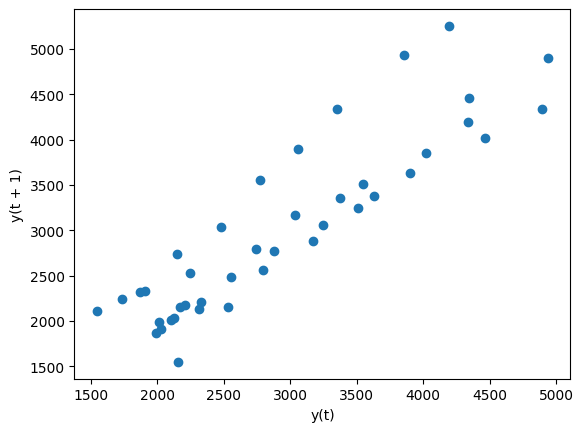

In [29]:
lag_plot(df)

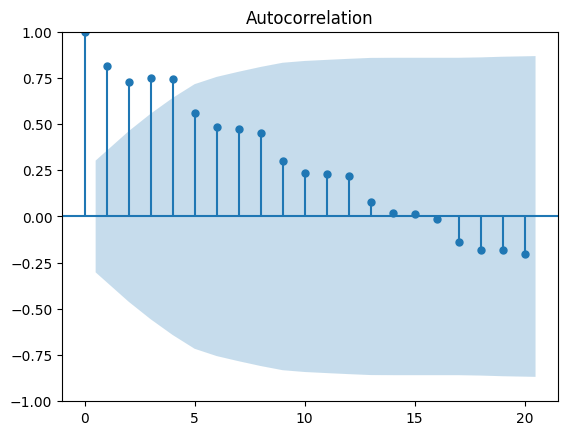

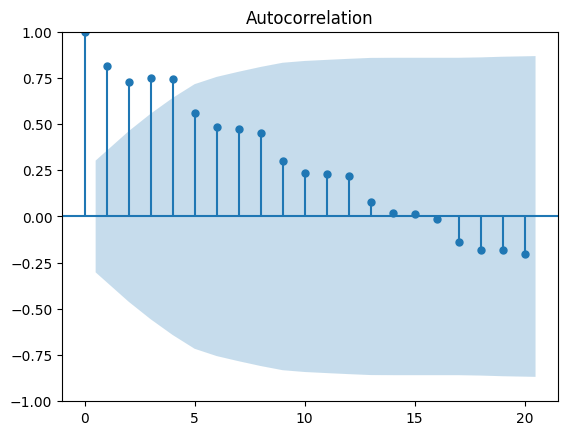

In [30]:
plot_acf(df,lags=20)

In [31]:
#Upsampling
upsample=df.resample("M").mean()
upsample.head()

,Sales
date,
1986-01-31,1734.827000
1986-02-28,NaN
1986-03-31,NaN
1986-04-30,2244.960999
1986-05-31,NaN


In [33]:
interpolate=upsample.interpolate(method="linear")
interpolate.head()

,Sales
date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330


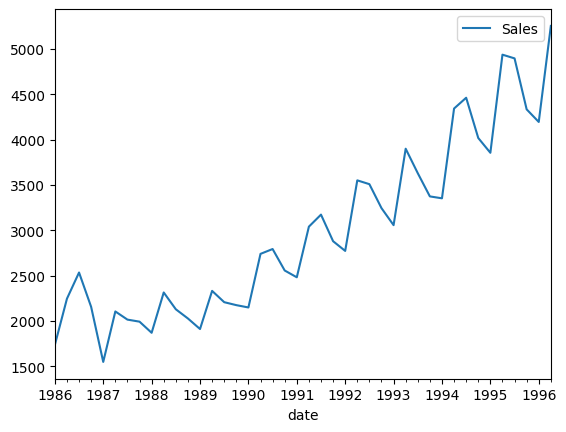

In [34]:
interpolate.plot()
plt.show()

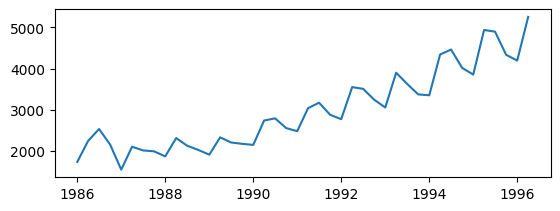

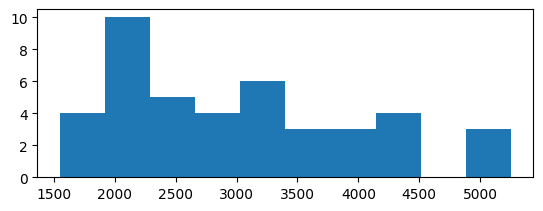

In [36]:
#Transformations
plt.subplot(211)
plt.plot(df)
plt.show()

plt.subplot(212)
plt.hist(df)
plt.show()

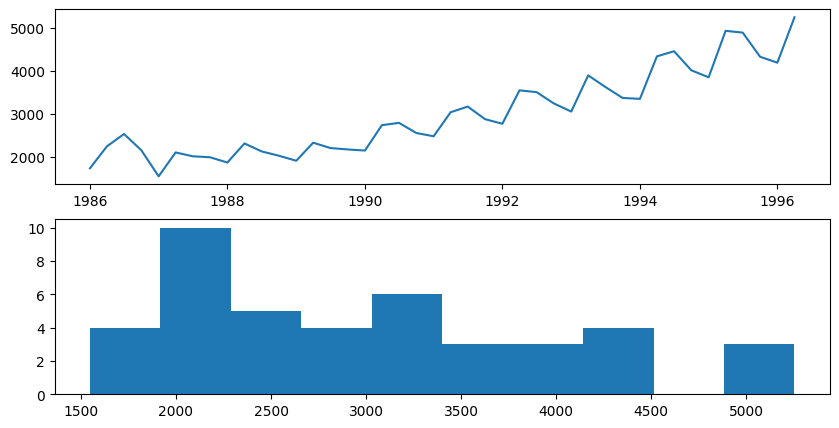

In [37]:
#Square Root Transform
dataframe=pd.DataFrame(df.values)
dataframe.columns=["Sales"]
dataframe["Sales"]=np.sqrt(dataframe["Sales"])

plt.figure(figsize=(10,5))
plt.subplot(211)
plt.plot(df["Sales"])
plt.subplot(212)
plt.hist(df["Sales"])
plt.show()

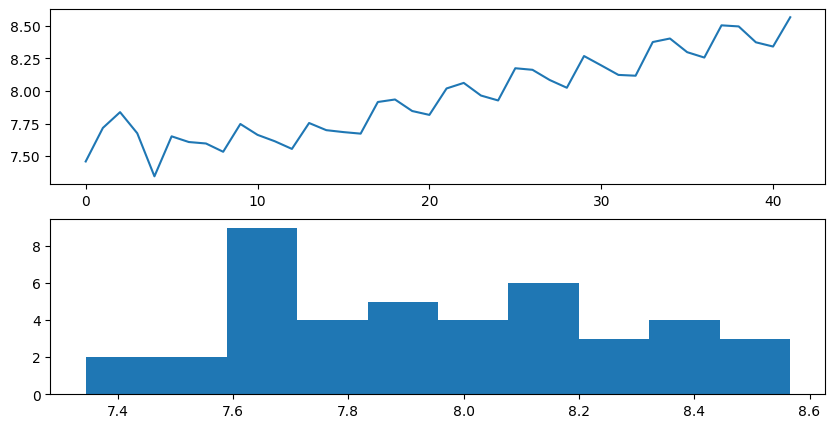

In [38]:
#Log Transform
dataframe=pd.DataFrame(df.values)
dataframe.columns=["Sales"]
dataframe["Sales"]=np.log(dataframe["Sales"])

plt.figure(figsize=(10,5))
plt.subplot(211)
plt.plot(dataframe["Sales"])
plt.subplot(212)
plt.hist(dataframe["Sales"])
plt.show()

In [39]:
Train=interpolate.head(110)
Test=interpolate.tail(14)

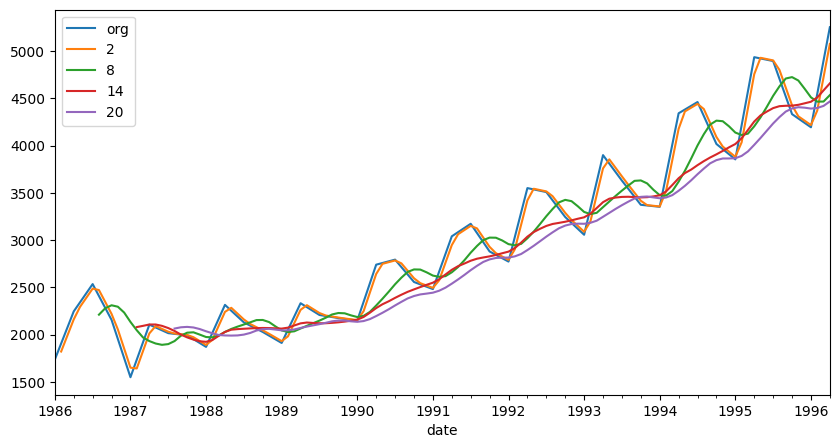

In [40]:
plt.figure(figsize=(10,5))
interpolate.Sales.plot(label="org")
for i in range(2,24,6):
  interpolate.Sales.rolling(i).mean().plot(label=str(i))
plt.legend(loc="best")
plt.show()

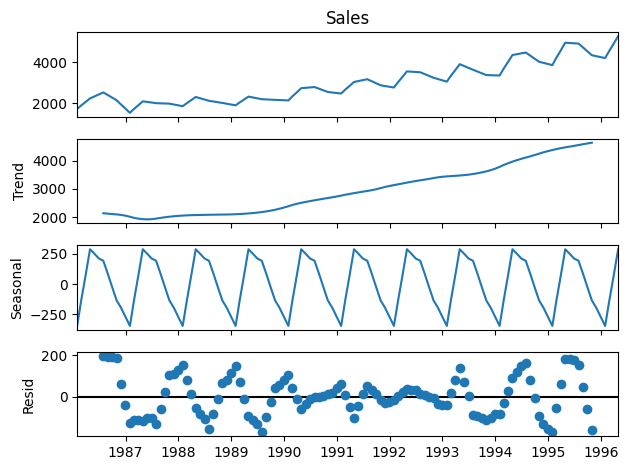

In [41]:
sd=seasonal_decompose(interpolate["Sales"],period=12)
sd.plot()
plt.show()

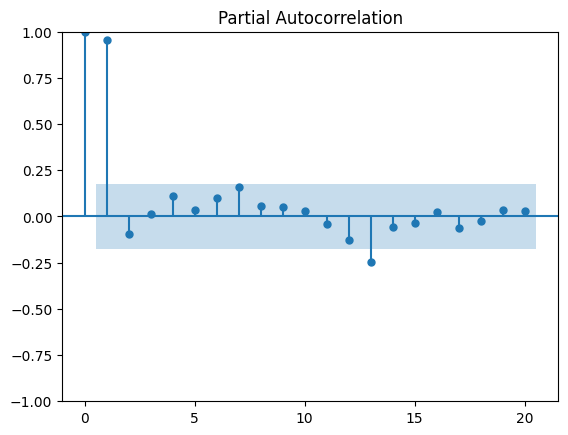

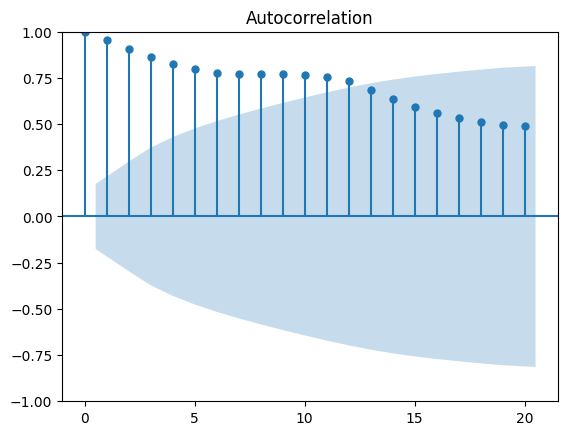

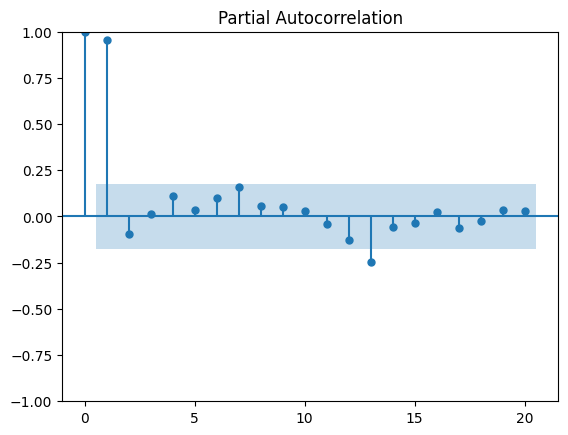

In [43]:
plot_acf(interpolate.Sales,lags=20)
plot_pacf(interpolate.Sales,lags=20)

In [44]:
def MAPE(pred,org):
  temp=np.abs((pred-org)/org)*100
  return np.mean(temp)

In [45]:
ses=SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.6)
ses_pred=ses.predict(start=Test.index[0],end=Test.index[-1])
MAPE(ses_pred,Test["Sales"])

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


11.892133711043797

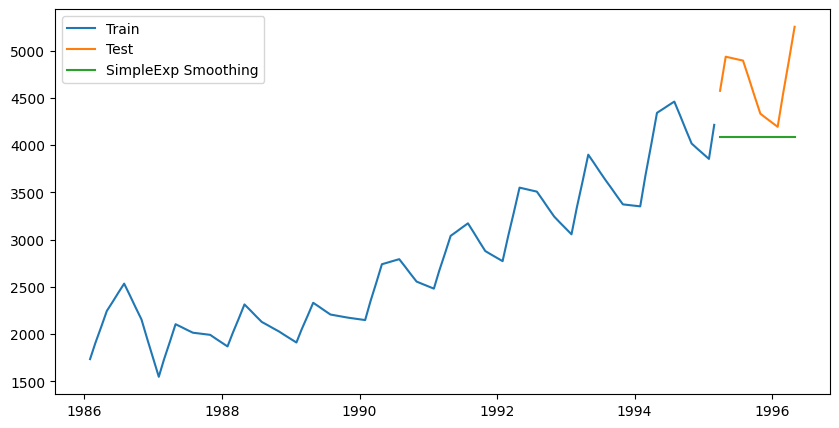

In [47]:
plt.figure(figsize=(10,5))
plt.plot(Train.Sales,label="Train")
plt.plot(Test.Sales,label="Test")
plt.plot(ses_pred,label="SimpleExp Smoothing")
plt.legend(loc="best")
plt.show()

In [48]:
holt=Holt(Train["Sales"]).fit(smoothing_level=0.6,smoothing_slope=0.4)
holt_pred=holt.predict(start=Test.index[0],end=Test.index[-1])
MAPE(holt_pred,Test["Sales"])

<ipython-input-48-dabd64177eea>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt=Holt(Train["Sales"]).fit(smoothing_level=0.6,smoothing_slope=0.4)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


9.501819971149354

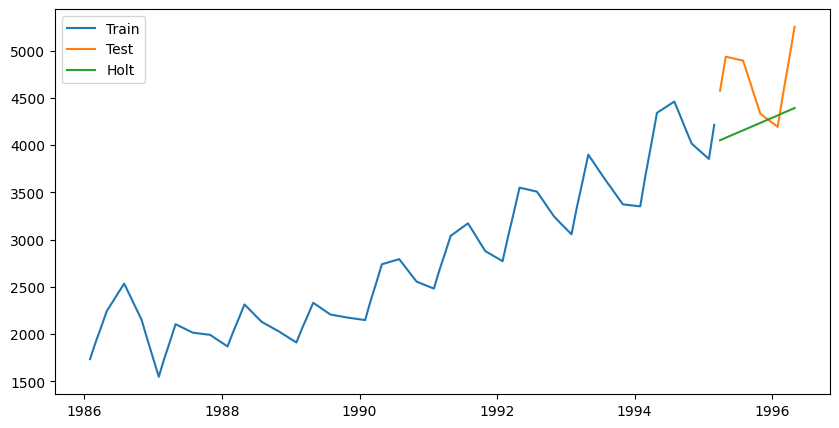

In [49]:
plt.figure(figsize=(10,5))
plt.plot(Train.Sales,label="Train")
plt.plot(Test.Sales,label="Test")
plt.plot(holt_pred,label="Holt")
plt.legend(loc="best")
plt.show()

In [52]:
#Additive
es_add=ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.6,smoothing_slope=0.4)
es_add_pred=es_add.predict(start=Test.index[0],end=Test.index[-1])
MAPE(es_add_pred,Test["Sales"])

<ipython-input-52-49f75aba4e32>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  es_add=ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.6,smoothing_slope=0.4)


3.744304155271926

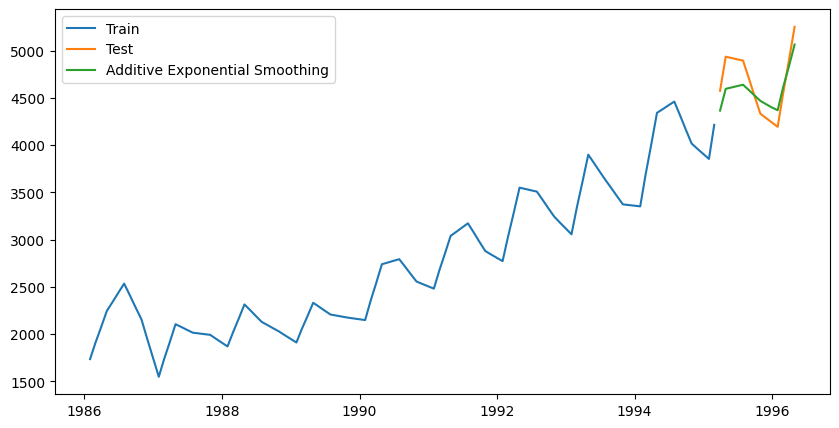

In [53]:
plt.figure(figsize=(10,5))
plt.plot(Train.Sales,label="Train")
plt.plot(Test.Sales,label="Test")
plt.plot(es_add_pred,label="Additive Exponential Smoothing")
plt.legend(loc="best")
plt.show()

In [54]:
es_ma=ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.6,smoothing_slope=0.4)
es_ma_pred=es_ma.predict(start=Test.index[0],end=Test.index[-1])
MAPE(es_ma_pred,Test["Sales"])

<ipython-input-54-44c85a7559a7>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  es_ma=ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.6,smoothing_slope=0.4)


2.3129289035900933

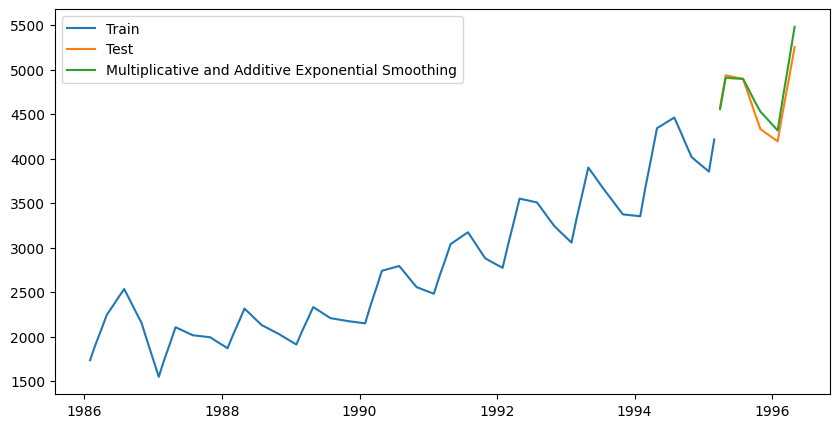

In [55]:
plt.figure(figsize=(10,5))
plt.plot(Train.Sales,label="Train")
plt.plot(Test.Sales,label="Test")
plt.plot(es_ma_pred,label="Multiplicative and Additive Exponential Smoothing")
plt.legend(loc="best")
plt.show()

In [56]:
rmse_es_ma=np.sqrt(mean_squared_error(es_ma_pred,Test["Sales"]))
print("Root Mean Squared Error (RMSE):",rmse_es_ma)

Root Mean Squared Error (RMSE): 130.9392686479279


In [57]:
final=ExponentialSmoothing(interpolate["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()
final.forecast(10)

1996-05-31    5363.918570
1996-06-30    5517.544748
1996-07-31    5663.016046
1996-08-31    5714.962718
1996-09-30    5780.614509
1996-10-31    5845.922261
1996-11-30    5950.177628
1996-12-31    6012.007227
1997-01-31    6079.007289
1997-02-28    6459.183036
Freq: M, dtype: float64

In [58]:
interpolate

,Sales
date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


In [59]:
interpolate.reset_index(inplace=True)

In [60]:
interpolate

,date,Sales
0,1986-01-31,1734.827000
1,1986-02-28,1904.871666
2,1986-03-31,2074.916332
3,1986-04-30,2244.960999
4,1986-05-31,2341.242330
...,...,...
119,1995-12-31,4240.333333
120,1996-01-31,4194.000000
121,1996-02-29,4547.000000
122,1996-03-31,4900.000000


In [61]:
interpolate["t"]=1
interpolate

,date,Sales,t
0,1986-01-31,1734.827000,1
1,1986-02-28,1904.871666,1
2,1986-03-31,2074.916332,1
3,1986-04-30,2244.960999,1
4,1986-05-31,2341.242330,1
...,...,...,...
119,1995-12-31,4240.333333,1
120,1996-01-31,4194.000000,1
121,1996-02-29,4547.000000,1
122,1996-03-31,4900.000000,1


In [62]:
for i,row in interpolate.iterrows():
  interpolate["t"].iloc[i]=i+1

<ipython-input-62-fe81f277287e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolate["t"].iloc[i]=i+1


In [63]:
interpolate

,date,Sales,t
0,1986-01-31,1734.827000,1
1,1986-02-28,1904.871666,2
2,1986-03-31,2074.916332,3
3,1986-04-30,2244.960999,4
4,1986-05-31,2341.242330,5
...,...,...,...
119,1995-12-31,4240.333333,120
120,1996-01-31,4194.000000,121
121,1996-02-29,4547.000000,122
122,1996-03-31,4900.000000,123


In [64]:
interpolate["t_sq"]=(interpolate["t"])**2
interpolate

,date,Sales,t,t_sq
0,1986-01-31,1734.827000,1,1
1,1986-02-28,1904.871666,2,4
2,1986-03-31,2074.916332,3,9
3,1986-04-30,2244.960999,4,16
4,1986-05-31,2341.242330,5,25
...,...,...,...,...
119,1995-12-31,4240.333333,120,14400
120,1996-01-31,4194.000000,121,14641
121,1996-02-29,4547.000000,122,14884
122,1996-03-31,4900.000000,123,15129


In [65]:
interpolate["months"]=interpolate.date.dt.strftime("%b")
interpolate["year"]=interpolate.date.dt.strftime("%Y")

In [66]:
interpolate

,date,Sales,t,t_sq,months,year
0,1986-01-31,1734.827000,1,1,Jan,1986
1,1986-02-28,1904.871666,2,4,Feb,1986
2,1986-03-31,2074.916332,3,9,Mar,1986
3,1986-04-30,2244.960999,4,16,Apr,1986
4,1986-05-31,2341.242330,5,25,May,1986
...,...,...,...,...,...,...
119,1995-12-31,4240.333333,120,14400,Dec,1995
120,1996-01-31,4194.000000,121,14641,Jan,1996
121,1996-02-29,4547.000000,122,14884,Feb,1996
122,1996-03-31,4900.000000,123,15129,Mar,1996


In [67]:
months=pd.get_dummies(interpolate["months"])
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119,0,0,1,0,0,0,0,0,0,0,0,0
120,0,0,0,0,1,0,0,0,0,0,0,0
121,0,0,0,1,0,0,0,0,0,0,0,0
122,0,0,0,0,0,0,0,1,0,0,0,0


In [68]:
months=months[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]]
cola=pd.concat([interpolate,months],axis=1)
cola.head()

,date,Sales,t,t_sq,months,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1986-01-31,1734.827000,1,1,Jan,1986,1,0,0,0,0,0,0,0,0,0,0,0
1,1986-02-28,1904.871666,2,4,Feb,1986,0,1,0,0,0,0,0,0,0,0,0,0
2,1986-03-31,2074.916332,3,9,Mar,1986,0,0,1,0,0,0,0,0,0,0,0,0
3,1986-04-30,2244.960999,4,16,Apr,1986,0,0,0,1,0,0,0,0,0,0,0,0
4,1986-05-31,2341.242330,5,25,May,1986,0,0,0,0,1,0,0,0,0,0,0,0


In [69]:
cola["log_sales"]=np.log(cola["Sales"])
cola.head()

,date,Sales,t,t_sq,months,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_sales
0,1986-01-31,1734.827000,1,1,Jan,1986,1,0,0,0,0,0,0,0,0,0,0,0,7.458663
1,1986-02-28,1904.871666,2,4,Feb,1986,0,1,0,0,0,0,0,0,0,0,0,0,7.552170
2,1986-03-31,2074.916332,3,9,Mar,1986,0,0,1,0,0,0,0,0,0,0,0,0,7.637676
3,1986-04-30,2244.960999,4,16,Apr,1986,0,0,0,1,0,0,0,0,0,0,0,0,7.716443
4,1986-05-31,2341.242330,5,25,May,1986,0,0,0,0,1,0,0,0,0,0,0,0,7.758437


<Axes: xlabel='months', ylabel='year'>

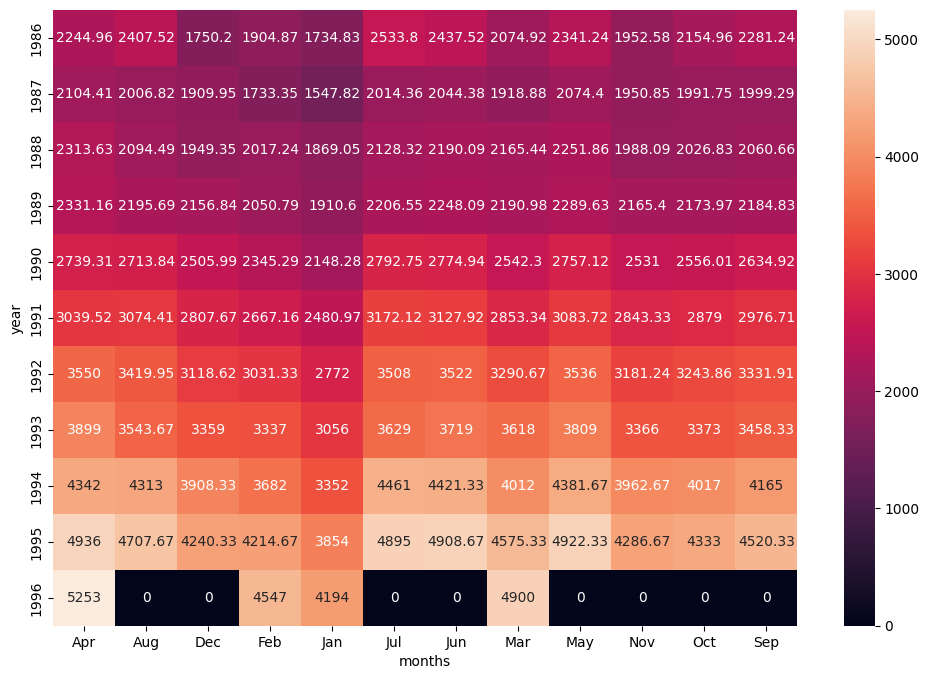

In [72]:
plt.figure(figsize=(12,8))
heatmap=pd.pivot_table(data=cola,values="Sales",index="year",columns="months",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap,annot=True,fmt="g")

<Axes: xlabel='year', ylabel='Sales'>

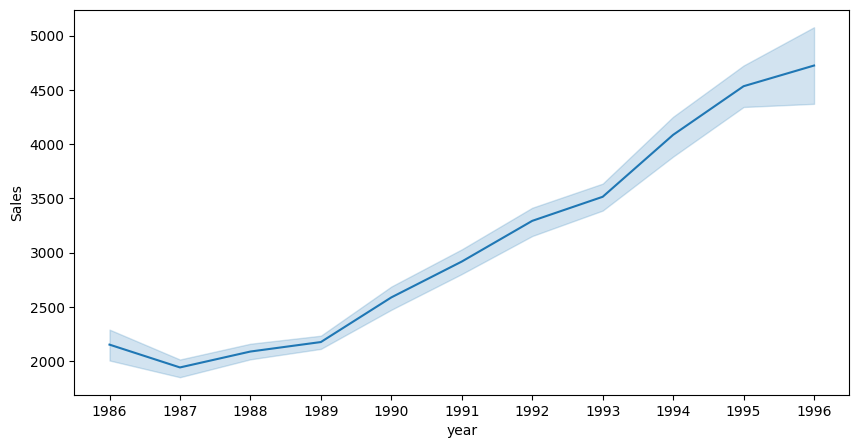

In [74]:
plt.figure(figsize=(10,5))
sns.lineplot(x="year",y="Sales",data=cola)

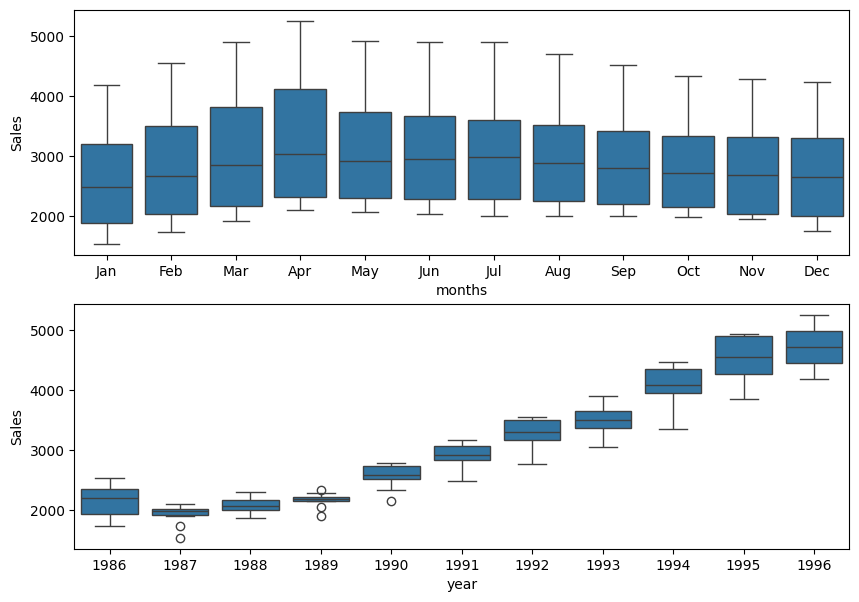

In [77]:
plt.figure(figsize=(10,7))
plt.subplot(211)
sns.boxplot(x="months",y="Sales",data=cola)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=cola)
plt.show()

In [78]:
Train=cola.head(112)
Test=cola.tail(12)

In [80]:
#Linear
linear=smf.ols("Sales~t",data=Train).fit()
linear_pred=pd.Series(linear.predict(pd.DataFrame(Test["t"])))
rmse_linear=np.sqrt(np.mean((np.array(Test["Sales"])-np.array(linear_pred))**2))
rmse_linear

561.9428078334439

In [81]:
#Exponential
exp=smf.ols("log_sales~t",data=Train).fit()
exp_pred=pd.Series(exp.predict(pd.DataFrame(Test["t"])))
rmse_exp=np.sqrt(np.mean((np.array(Test["Sales"])-np.array(np.exp(exp_pred)))**2))
rmse_exp

432.87831178706824

In [82]:
#Quadratic
quad=smf.ols("Sales~t+t_sq",data=Train).fit()
quad_pred=pd.Series(quad.predict(Test[["t","t_sq"]]))
rmse_quad=np.sqrt(np.mean((np.array(Test["Sales"])-np.array(quad_pred))**2))
rmse_quad

416.1240473625764

In [83]:
#Additive Seasonality
add=smf.ols("Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=Train).fit()
add_pred=pd.Series(add.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add=np.sqrt(np.mean((np.array(Test["Sales"])-np.array(add_pred))**2))
rmse_add

1840.3042900245848

In [85]:
#Additive Quadratic Seasonality
add_quad=smf.ols("Sales~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=Train).fit()
add_quad_pred=pd.Series(add_quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_quad=np.sqrt(np.mean((np.array(Test["Sales"])-np.array(add_quad_pred))**2))
rmse_add_quad

271.9062333127486

In [86]:
#Multiplicative Seasonality
mul=smf.ols("log_sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=Train).fit()
mul_pred=pd.Series(mul.predict(Test))
rmse_mul=np.sqrt(np.mean((np.array(Test["Sales"])-np.array(np.exp(mul_pred)))**2))
rmse_mul

1939.0823781993017

In [87]:
#Multiplicative Additive Seasonality
ma=smf.ols("log_sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=Train).fit()
ma_pred=pd.Series(ma.predict(Test))
rmse_ma=np.sqrt(np.mean((np.array(Test["Sales"])-np.array(np.exp(ma_pred)))**2))
rmse_ma

236.26364020376843

In [89]:
data={"Model":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add","rmse_add_quad","rmse_mul","rmse_ma"]),"RMSE values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add,rmse_add_quad,rmse_mul,rmse_ma])}
rmse_value_table=pd.DataFrame(data)
rmse_value_table.sort_values("RMSE values")

,Model,RMSE values
6,rmse_ma,236.263640
4,rmse_add_quad,271.906233
2,rmse_quad,416.124047
1,rmse_exp,432.878312
0,rmse_linear,561.942808
3,rmse_add,1840.304290
5,rmse_mul,1939.082378


**Inference: By the analysis above, we can conclude that "rmse_ma" may be preferred to others.**